In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/project-statistika-praktik/Jan_2019_ontime.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
#Menampilkan jumlah row dan column dari dataset
df = pd.read_csv("../input/project-statistika-praktik/Jan_2019_ontime.csv")
df.shape

(583985, 19)

In [4]:
#Menampilkan tabel row dan column dari dataset
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,9E,20363,9E,N348PQ,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,9E,20363,9E,N8896A,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,9E,20363,9E,N8886A,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,1,2,9E,20363,9E,N8974C,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


In [5]:
#Menampilan informasi terkain data set (total column, null column, type, memory)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN                 583985 non-null  object 
 9   DEST_AIRPORT_ID        583985 non-null  int64  
 10  DEST                   583985 non-null  object 
 11  DEP_TIME               567633 non-null  float64
 12  DEP_DEL15              567630 non-null  float64
 13  DEP_TIME_BLK           583985 non-null  object 
 14  ARR_TIME               566924 non-nu

In [6]:
#Reduce/ mengecilkan penggunaan memory untuk dataset
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [7]:
#Reduce data set
df = reduce_mem_usage(df)

Memory usage after optimization is: 38.99 MB
Decreased by 53.9%


In [8]:
#Menampilan informasi terkain data set (total column, null column, type, memory) - setelah di reduce
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int8   
 1   DAY_OF_WEEK            583985 non-null  int8   
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int16  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int16  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int16  
 8   ORIGIN                 583985 non-null  object 
 9   DEST_AIRPORT_ID        583985 non-null  int16  
 10  DEST                   583985 non-null  object 
 11  DEP_TIME               567633 non-null  float16
 12  DEP_DEL15              567630 non-null  float16
 13  DEP_TIME_BLK           583985 non-null  object 
 14  ARR_TIME               566924 non-nu

In [9]:
#Menampilkan type data categorical
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 6 categorical variables

The categorical variables are :

 ['OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST', 'DEP_TIME_BLK']


In [10]:
#Cek type data categorical yang bernilai null
df[categorical].isnull().sum()

OP_UNIQUE_CARRIER       0
OP_CARRIER              0
TAIL_NUM             2543
ORIGIN                  0
DEST                    0
DEP_TIME_BLK            0
dtype: int64

In [11]:
#Menampilkan type data numerical
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 13 numerical variables

The numerical variables are : ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DEP_TIME', 'DEP_DEL15', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'DISTANCE']


In [12]:
#Cek type data categorical yang bernilai null
df[numerical].isnull().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
DEST_AIRPORT_ID              0
DEP_TIME                 16352
DEP_DEL15                16355
ARR_TIME                 17061
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [13]:
#Menghapus column yang tidak digunakan
df = df.drop(columns=['DAY_OF_MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER',
                           'OP_CARRIER_AIRLINE_ID','OP_CARRIER','TAIL_NUM',
                           'OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID',  'DEP_DEL15',
                           'DEP_TIME_BLK', 'CANCELLED','DIVERTED','DISTANCE'])
data = df.head(350)
data.head()

,ORIGIN,DEST,DEP_TIME,ARR_TIME,ARR_DEL15
0,GNV,ATL,601.0,722.0,0.0
1,MSP,CVG,1359.0,1633.0,0.0
2,DTW,CVG,1215.0,1329.0,0.0
3,TLH,ATL,1521.0,1625.0,0.0
4,ATL,FSM,1847.0,1940.0,0.0


In [14]:
# Membuat variabel untuk mengakses data pada keseluruhan column tetapi dengan rows hanya sampai 4
X = data.iloc[:, :4].values
Y = data.iloc[:, 4].values

In [15]:
# Mengubah nilai nilai yang bersifat categorical menjadi integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])

In [16]:
#Menampilkan data yang telah diubah dan dipilih ditampilkan
print(X)

[[38 4 601.0 722.0]
 [68 23 1359.0 1633.0]
 [30 23 1215.0 1329.0]
 ...
 [42 27 2056.0 854.0]
 [13 27 1132.0 1409.0]
 [74 11 1326.0 1616.0]]


In [17]:
#Membagi data menjadi bagian testing dan training
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

print(x_test)

[[49 4 1553.0 1832.0]
 [49 4 727.0 1003.0]
 [20 63 917.0 1045.0]
 [4 8 854.0 854.0]
 [77 74 552.0 725.0]
 [17 4 1415.0 1554.0]
 [51 14 1609.0 1725.0]
 [23 4 1202.0 1250.0]
 [25 68 651.0 743.0]
 [20 68 1300.0 1435.0]
 [74 54 1558.0 1848.0]
 [68 67 1325.0 1418.0]
 [28 91 1838.0 2010.0]
 [99 4 1330.0 1422.0]
 [4 38 2220.0 2324.0]
 [4 21 1054.0 1203.0]
 [80 11 919.0 1045.0]
 [72 58 2332.0 725.0]
 [68 51 956.0 1231.0]
 [64 10 1527.0 1640.0]
 [89 27 803.0 1347.0]
 [77 11 1902.0 2011.0]
 [4 2 2230.0 2324.0]
 [51 81 2152.0 2260.0]
 [4 42 1011.0 1112.0]
 [35 4 1332.0 1532.0]
 [51 83 1450.0 1637.0]
 [68 43 1936.0 2048.0]
 [33 29 824.0 1035.0]
 [24 68 1325.0 1417.0]
 [4 101 1742.0 1832.0]
 [14 4 1049.0 1150.0]
 [79 4 1353.0 1651.0]
 [4 90 949.0 1042.0]
 [24 68 817.0 900.0]
 [19 68 1051.0 1205.0]
 [4 50 2116.0 2230.0]
 [43 68 1605.0 1851.0]
 [4 6 912.0 1005.0]
 [59 4 1523.0 1748.0]
 [20 42 2104.0 2146.0]
 [4 95 1615.0 1711.0]
 [51 94 953.0 1129.0]
 [20 66 2114.0 2312.0]
 [77 11 2122.0 2232.0]
 [32

In [18]:
#Scalling dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

print(x_train)

[[ 0.99511432 -0.5360873  -0.48309283  0.31475822]
 [ 0.75158528  1.2089074   0.66070546  0.77976754]
 [ 0.75158528 -0.43138762 -1.13508042 -0.84341918]
 ...
 [-1.33580648  0.16191058 -0.69290198 -1.05419443]
 [-0.43127005 -1.23408518 -0.21913938 -0.33712399]
 [ 0.36889679 -0.46628751 -1.61109904 -1.72780606]]


In [19]:
#Model data training yang digunakan (GaussianNB)
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [20]:
#Menyimpulkan data array dalam bentuk fungsi untuk menentukan akurasi dataset
y_pred = classifier.predict(x_test)

print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
#Mencari nilai akurasi model
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9286


In [22]:
#Mencari akurasi nilai dengan confussion matrix
from sklearn.metrics import confusion_matrix,accuracy_score

ac = accuracy_score(y_test, y_pred)

ac

0.9285714285714286

In [23]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[65  0]
 [ 5  0]]

True Positives(TP) =  65

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  5


<AxesSubplot:>

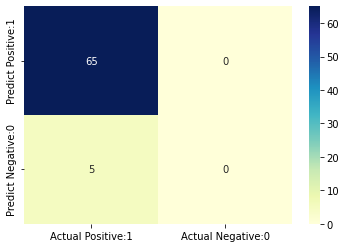

In [24]:
#Classification matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [25]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [26]:
# Clasifikasi akurasi

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9286


In [27]:
# Clasifikasi error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0714


In [28]:
# Mencari nilai Presisi
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [29]:
#Mencari nilai sensitifitas
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9286


In [30]:
#Mencari rate dari True Positif
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9286


In [31]:
#Mencari rate dari False Positif
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : nan


In [32]:
#Nilai Khusus
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : nan
